In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Problem 1

In [3]:
top_companies = pd.read_csv("Top_global_companies.csv")
top_companies.columns = ['Rank', "Name", "Number of Employees", "Change in Rank", "Revenue", "Revenue Change", 
                         "Profit", "Profit Change", "Assets", "Market Value"]
top_10_companies = top_companies.head(10)
top_10_companies

,Rank,Name,Number of Employees,Change in Rank,Revenue,Revenue Change,Profit,Profit Change,Assets,Market Value
0,1,Walmart,"2,200,000",-,"$523,964.00",1.90%,"$14,881.00",123.10%,"$236,495.00","$321,803.00"
1,2,Amazon.com,"798,000",3,"$280,522.00",20.50%,"$11,588.00",15.00%,"$225,248.00","$970,680.00"
2,3,Exxon Mobil,"74,900",-1,"$264,938.00",-8.70%,"$14,340.00",-31.20%,"$362,597.00","$160,696.00"
3,4,Apple,"137,000",-1,"$260,174.00",-2.00%,"$55,256.00",-7.20%,"$338,516.00","$1,112,641.00"
4,5,CVS Health,"290,000",3,"$256,776.00",32.00%,"$6,634.00",-,"$222,449.00","$77,376.00"
5,6,Berkshire Hathaway,"391,500",-2,"$254,616.00",2.70%,"$81,417.00",1924.80%,"$817,729.00","$442,897.00"
6,7,UnitedHealth Group,"325,000",-1,"$242,155.00",7.00%,"$13,839.00",15.50%,"$173,889.00","$236,555.00"
7,8,McKesson,"70,000",-1,"$214,319.00",2.90%,$34.00,-49.30%,"$59,672.00","$21,845.00"
8,9,AT&T,"247,800",-,"$181,193.00",6.10%,"$13,903.00",-28.20%,"$551,669.00","$209,388.00"
9,10,AmerisourceBergen,"21,500",-,"$179,589.00",6.90%,$855.40,-48.40%,"$39,172.00","$18,221.00"


In [4]:
new_arr = np.array([])
for i in top_10_companies["Profit Change"]: 
    numb = 0.0
    if i != '-': 
        numb = float(i.replace("%", ""))
    new_arr = np.append(new_arr, numb)

In [199]:
data = {
    "Name": ["Walmart", "Sinopec Group", "State Grid", "China National Petroleum", "Royal Dutch Shell", 
            "Saudi Aramco", "Volkswagen", "BP", "Amazon.com", "Toyota Motor"],
    "Revenue": [523964.0, 407009.0, 383906.0, 379130.0, 352106.0, 329784.0, 282760, 
               282616.0, 280522.0, 275288.0],
    "Revenue Change": [1.9, -1.8, -0.8, -3.5, -11.2, -7.3, 1.6, -7, 20.5, 1],
    "Profit": [14881.0, 6793.2, 7970.0, 4443.2, 15842.0, 88210.9, 15542, 4026, 11588, 
              19096.2],
    "Profit Change": [123.1, 16.2, -2.5, 95.7, 32.2, -20.5, 8.5, -57.1, 15, 12.4],
}
new_top_10_companies = pd.DataFrame(data)
new_top_10_companies

,Name,Revenue,Revenue Change,Profit,Profit Change
0,Walmart,523964.0,1.9,14881.0,123.1
1,Sinopec Group,407009.0,-1.8,6793.2,16.2
2,State Grid,383906.0,-0.8,7970.0,-2.5
3,China National Petroleum,379130.0,-3.5,4443.2,95.7
4,Royal Dutch Shell,352106.0,-11.2,15842.0,32.2
5,Saudi Aramco,329784.0,-7.3,88210.9,-20.5
6,Volkswagen,282760.0,1.6,15542.0,8.5
7,BP,282616.0,-7.0,4026.0,-57.1
8,Amazon.com,280522.0,20.5,11588.0,15.0
9,Toyota Motor,275288.0,1.0,19096.2,12.4


## Graph Total Revenue and Total Profit

In [200]:
def horiz_bar_graph(ax, title, xlabel, ylabel, xcol, ycol, shift, mean_loc, change): 
    ax.set_title(title, fontsize = 30)
    ax.set_xlabel(xlabel, labelpad = 40, fontsize = 25)
    ax.set_ylabel(ylabel, rotation = 0, labelpad = 150, fontsize = 25)
    ax.tick_params(axis = "both", labelsize = 15)
    new_tbl = new_top_10_companies.sort_values(ycol)
    ax.barh(new_tbl[xcol], new_tbl[ycol], color = "lightsteelblue")
    ax.axvline(new_tbl[ycol].mean(), linewidth = 2, color = "tomato", linestyle='dashed')
    if change: 
        ax.axvline(0, linewidth = 3, color = "black")
    ax.text(mean_loc, 1, "Mean " + ycol, color = "tomato", fontsize = 15)
    for i, v in enumerate(new_tbl[ycol]):
        if change: 
            str_val = str(float(v)) + "%"
        else: 
            str_val = "$" + str(int(v)) + ".00"
        if v >= 0: 
            ax.text(v + shift, i, str_val, color = "lightsteelblue", fontweight = 'bold', 
                    verticalalignment = 'center', horizontalalignment = 'left', fontsize = 15)
        else: 
            ax.text(v - shift, i, str_val, color = "lightsteelblue", fontweight = 'bold', 
                    verticalalignment = 'center', horizontalalignment = 'right', fontsize = 15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(.5)
    ax.spines['left'].set_linewidth(.5)

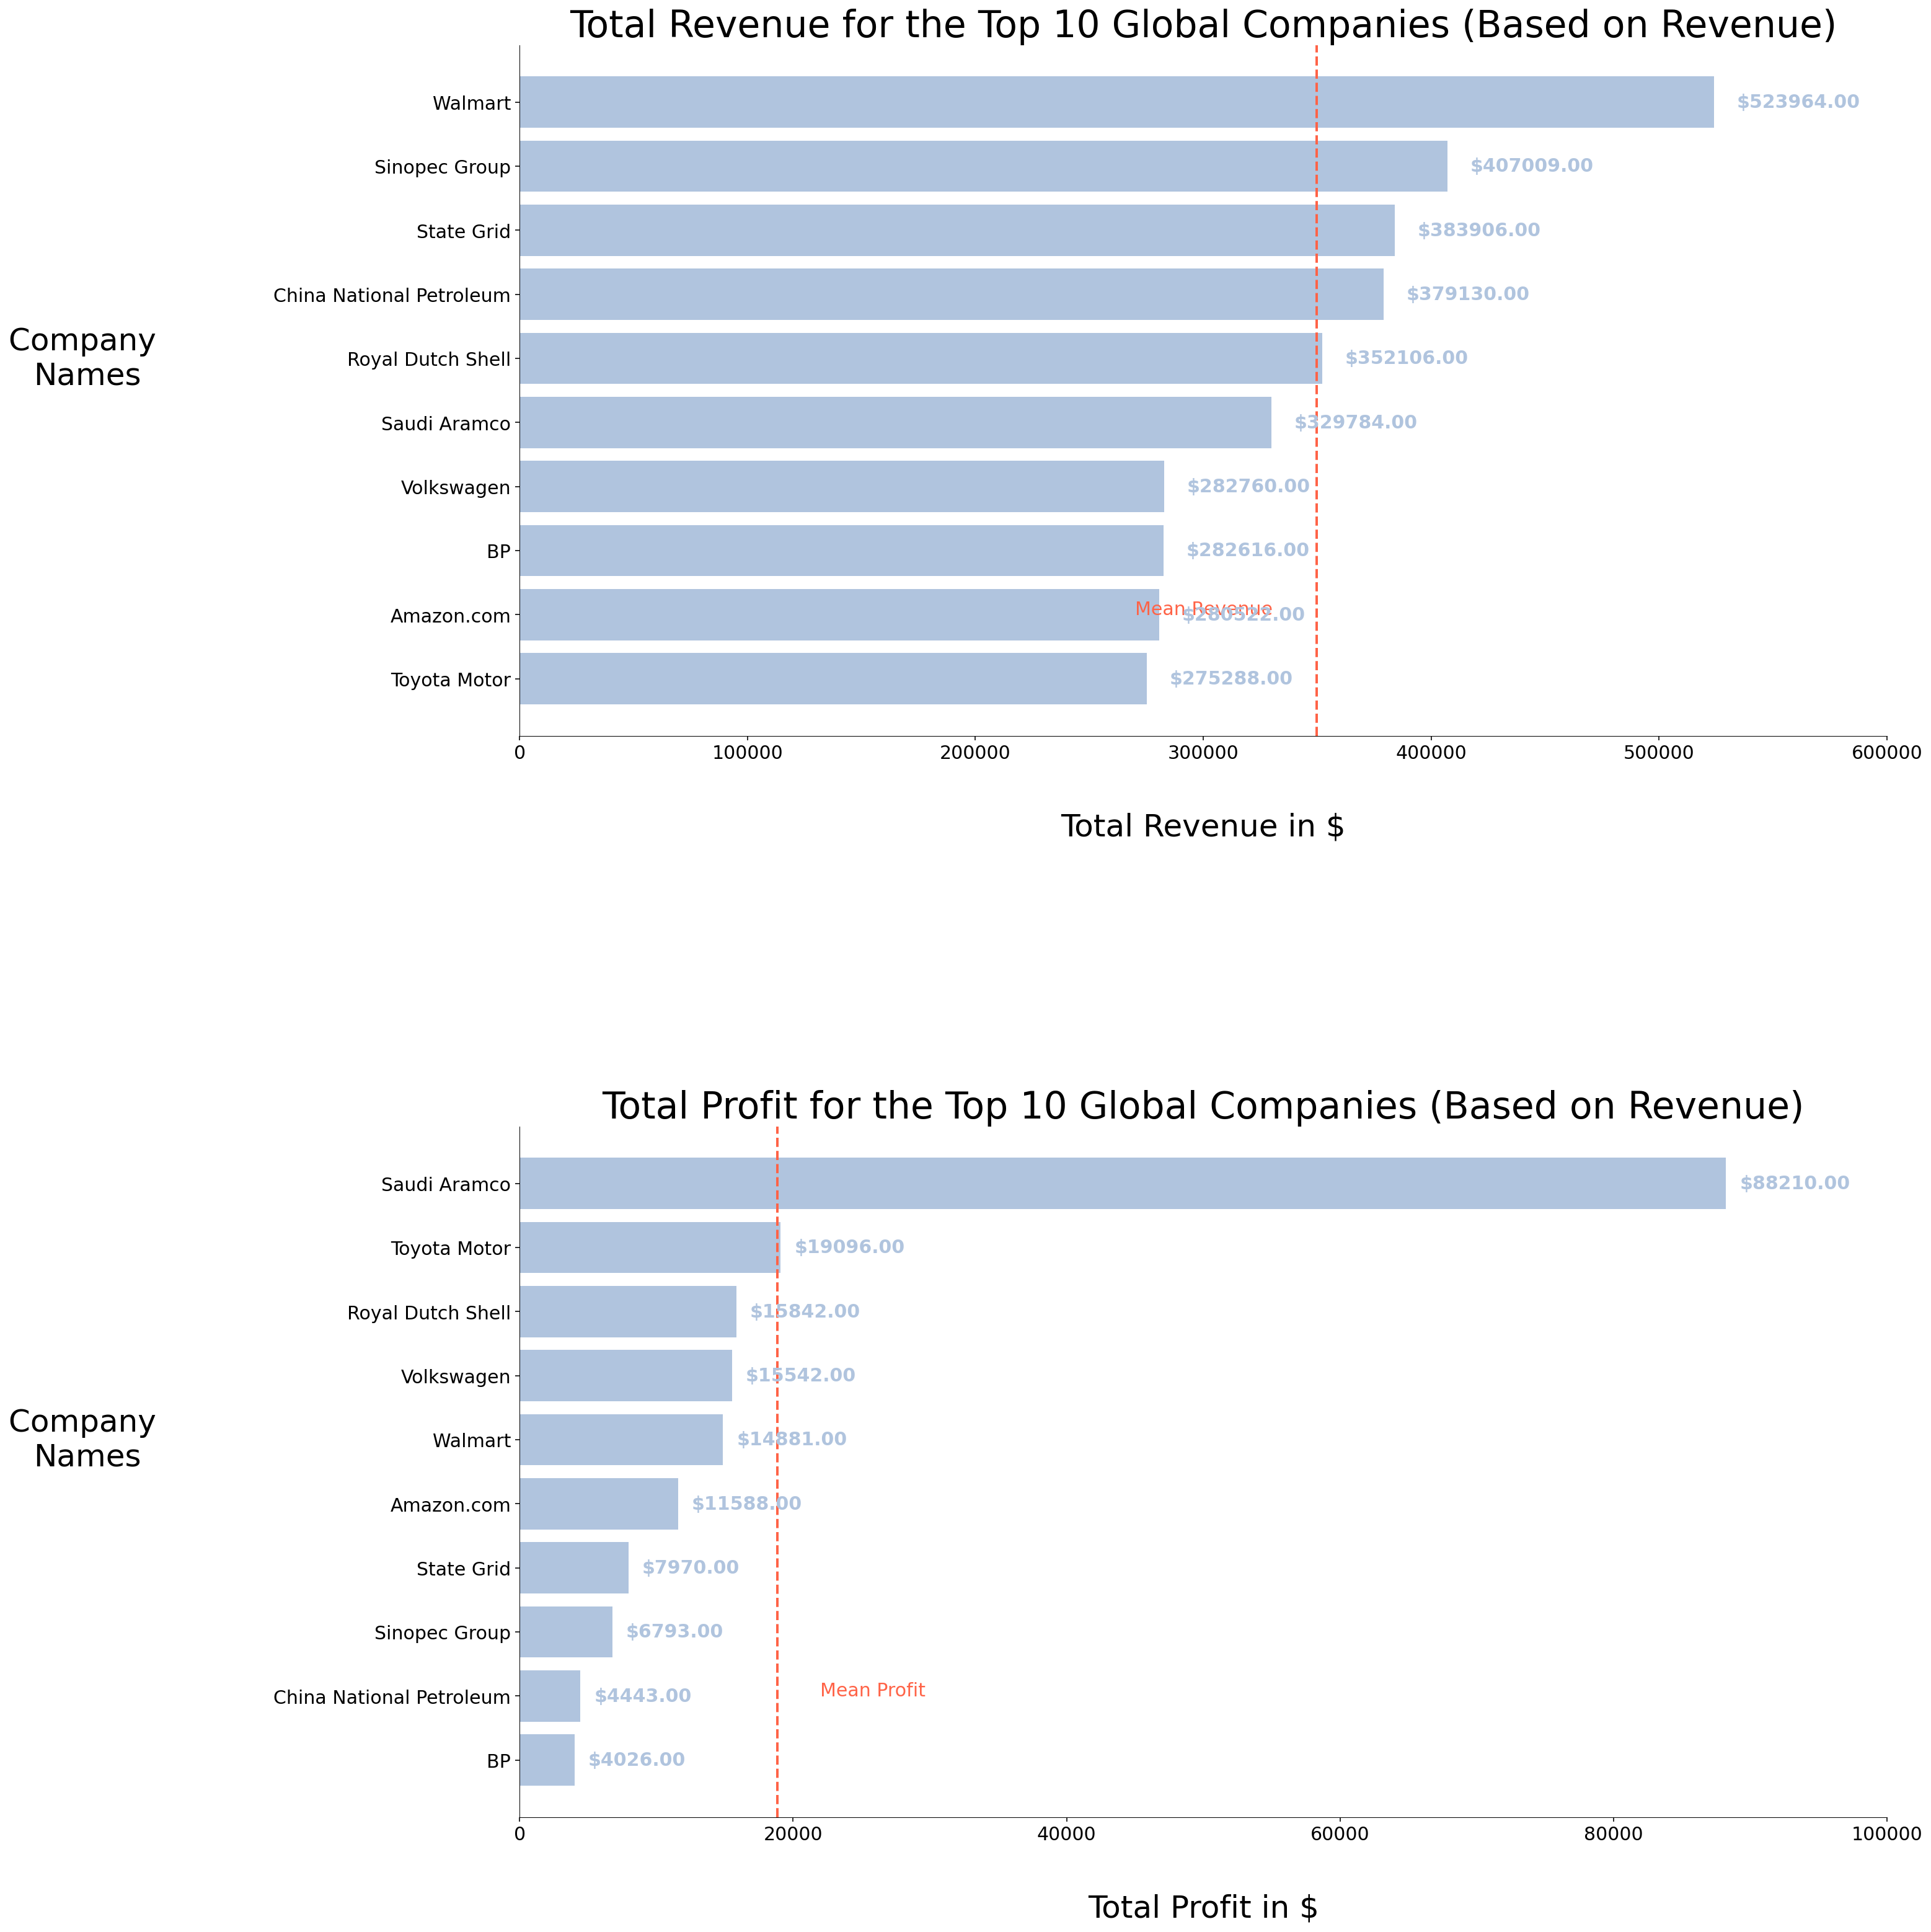

In [201]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (27, 27))

axes = axes.flatten()

axes[0].set_xlim(0, 600000)
horiz_bar_graph(axes[0], "Total Revenue for the Top 10 Global Companies (Based on Revenue)", 
               "Total Revenue in $", "Company \nNames", "Name", "Revenue", 10000, 270000, False)

axes[1].set_xlim(0, 100000)
horiz_bar_graph(axes[1], "Total Profit for the Top 10 Global Companies (Based on Revenue)", 
               "Total Profit in $", "Company \nNames", "Name", "Profit", 1000, 22000, False)


fig.tight_layout(pad = 20)
plt.show()

However, because a certain companies revenue or profit would occur relative to the amount of revenue they started with in the beginning of the year, in order to compare values it would be better to compare the percentage change of revenue and profit as shown in the two plots below. 

## Graph Revenue Change and Profit Change

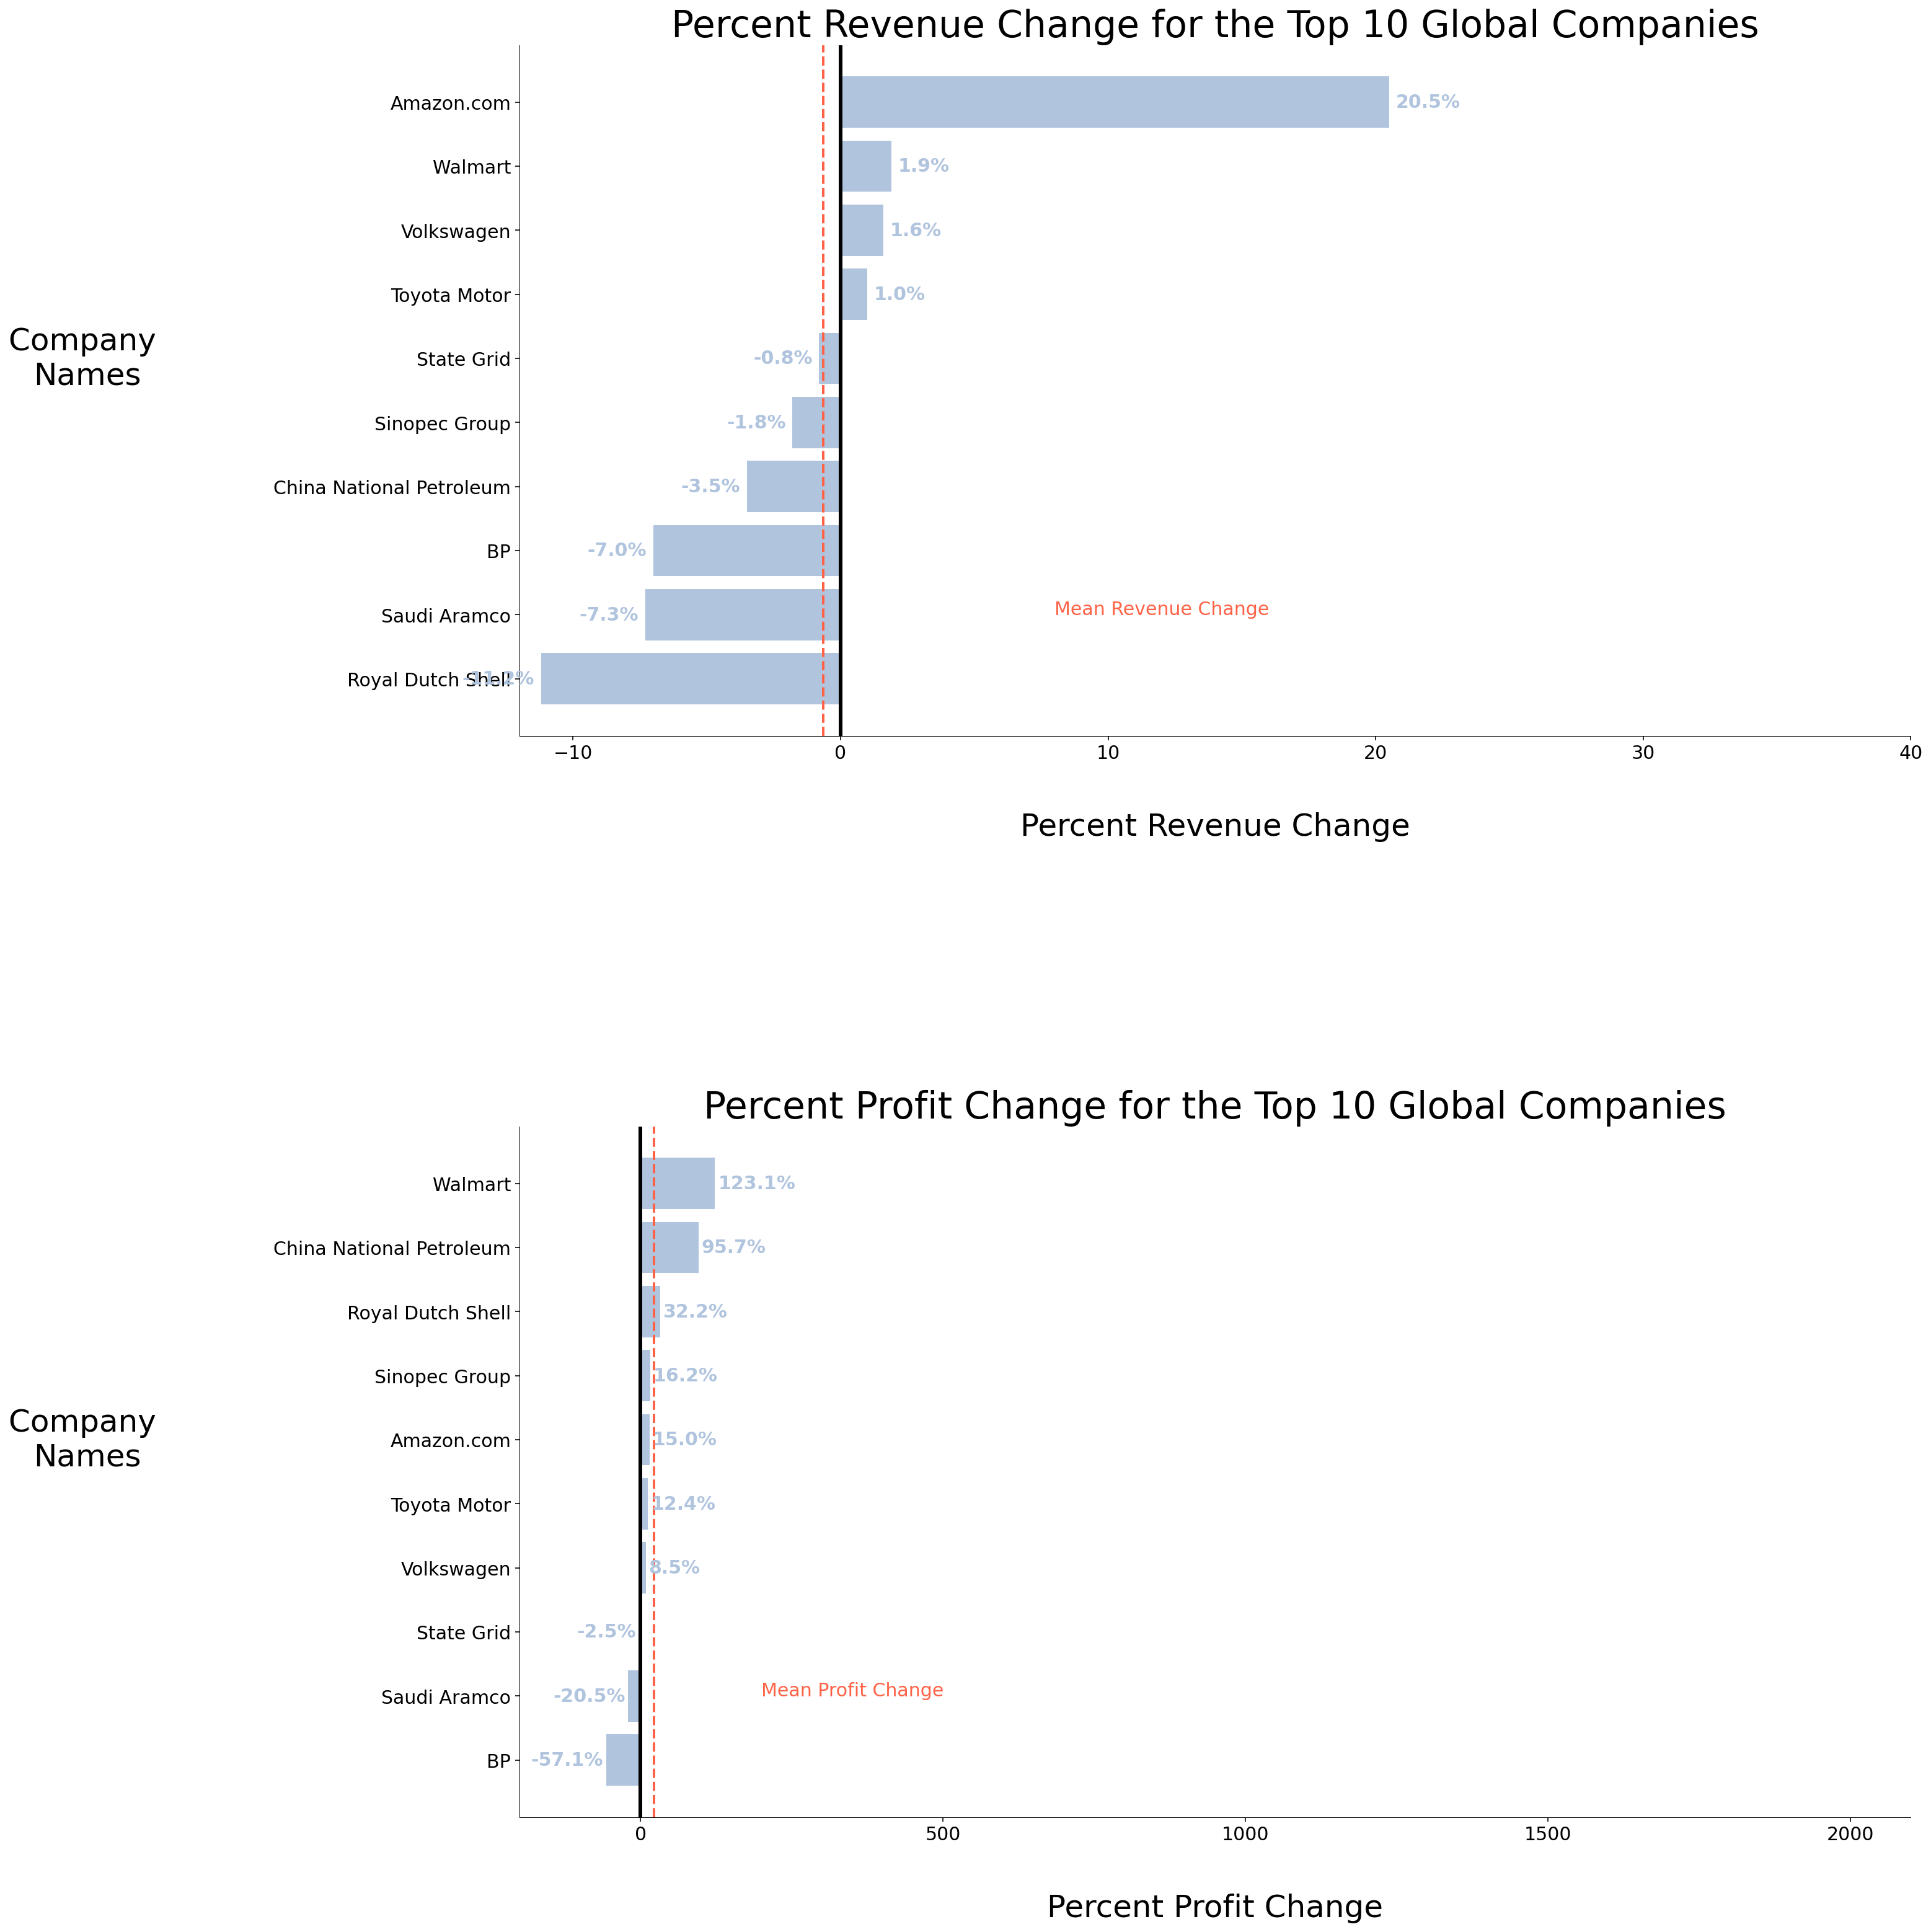

In [202]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (27, 27))

axes[0].set_xlim(-12, 40)
horiz_bar_graph(axes[0], "Percent Revenue Change for the Top 10 Global Companies", 
                "Percent Revenue Change", "Company \nNames", "Name", "Revenue Change", 0.25, 8, True)

axes[1].set_xlim(-200, 2100)
horiz_bar_graph(axes[1], "Percent Profit Change for the Top 10 Global Companies", 
                "Percent Profit Change", "Company \nNames", "Name", "Profit Change", 5, 200, True)

fig.tight_layout(pad = 20)
plt.show()

## Final Plot for Revenue Change and Profit Change

In [203]:
new_top_10_companies1 = new_top_10_companies.rename(columns = {"Revenue": "Revenue 2020"})
new_top_10_companies1["Revenue 2019"] = new_top_10_companies1["Revenue 2020"]/ (1  + new_top_10_companies1["Revenue Change"] * 0.01)
new_top_10_companies1 = new_top_10_companies1.rename(columns = {"Profit": "Profit 2020"})
new_top_10_companies1["Profit 2019"] = new_top_10_companies1["Profit 2020"] / (1 + new_top_10_companies1["Profit Change"] * 0.01)
new_top_10_companies1

,Name,Revenue 2020,Revenue Change,Profit 2020,Profit Change,Revenue 2019,Profit 2019
0,Walmart,523964.0,1.9,14881.0,123.1,514194.308145,6670.103093
1,Sinopec Group,407009.0,-1.8,6793.2,16.2,414469.450102,5846.127367
2,State Grid,383906.0,-0.8,7970.0,-2.5,387002.016129,8174.358974
3,China National Petroleum,379130.0,-3.5,4443.2,95.7,392880.829016,2270.413899
4,Royal Dutch Shell,352106.0,-11.2,15842.0,32.2,396515.765766,11983.358548
5,Saudi Aramco,329784.0,-7.3,88210.9,-20.5,355754.045307,110957.106918
6,Volkswagen,282760.0,1.6,15542.0,8.5,278307.086614,14324.423963
7,BP,282616.0,-7.0,4026.0,-57.1,303888.172043,9384.615385
8,Amazon.com,280522.0,20.5,11588.0,15.0,232798.340249,10076.521739
9,Toyota Motor,275288.0,1.0,19096.2,12.4,272562.376238,16989.501779


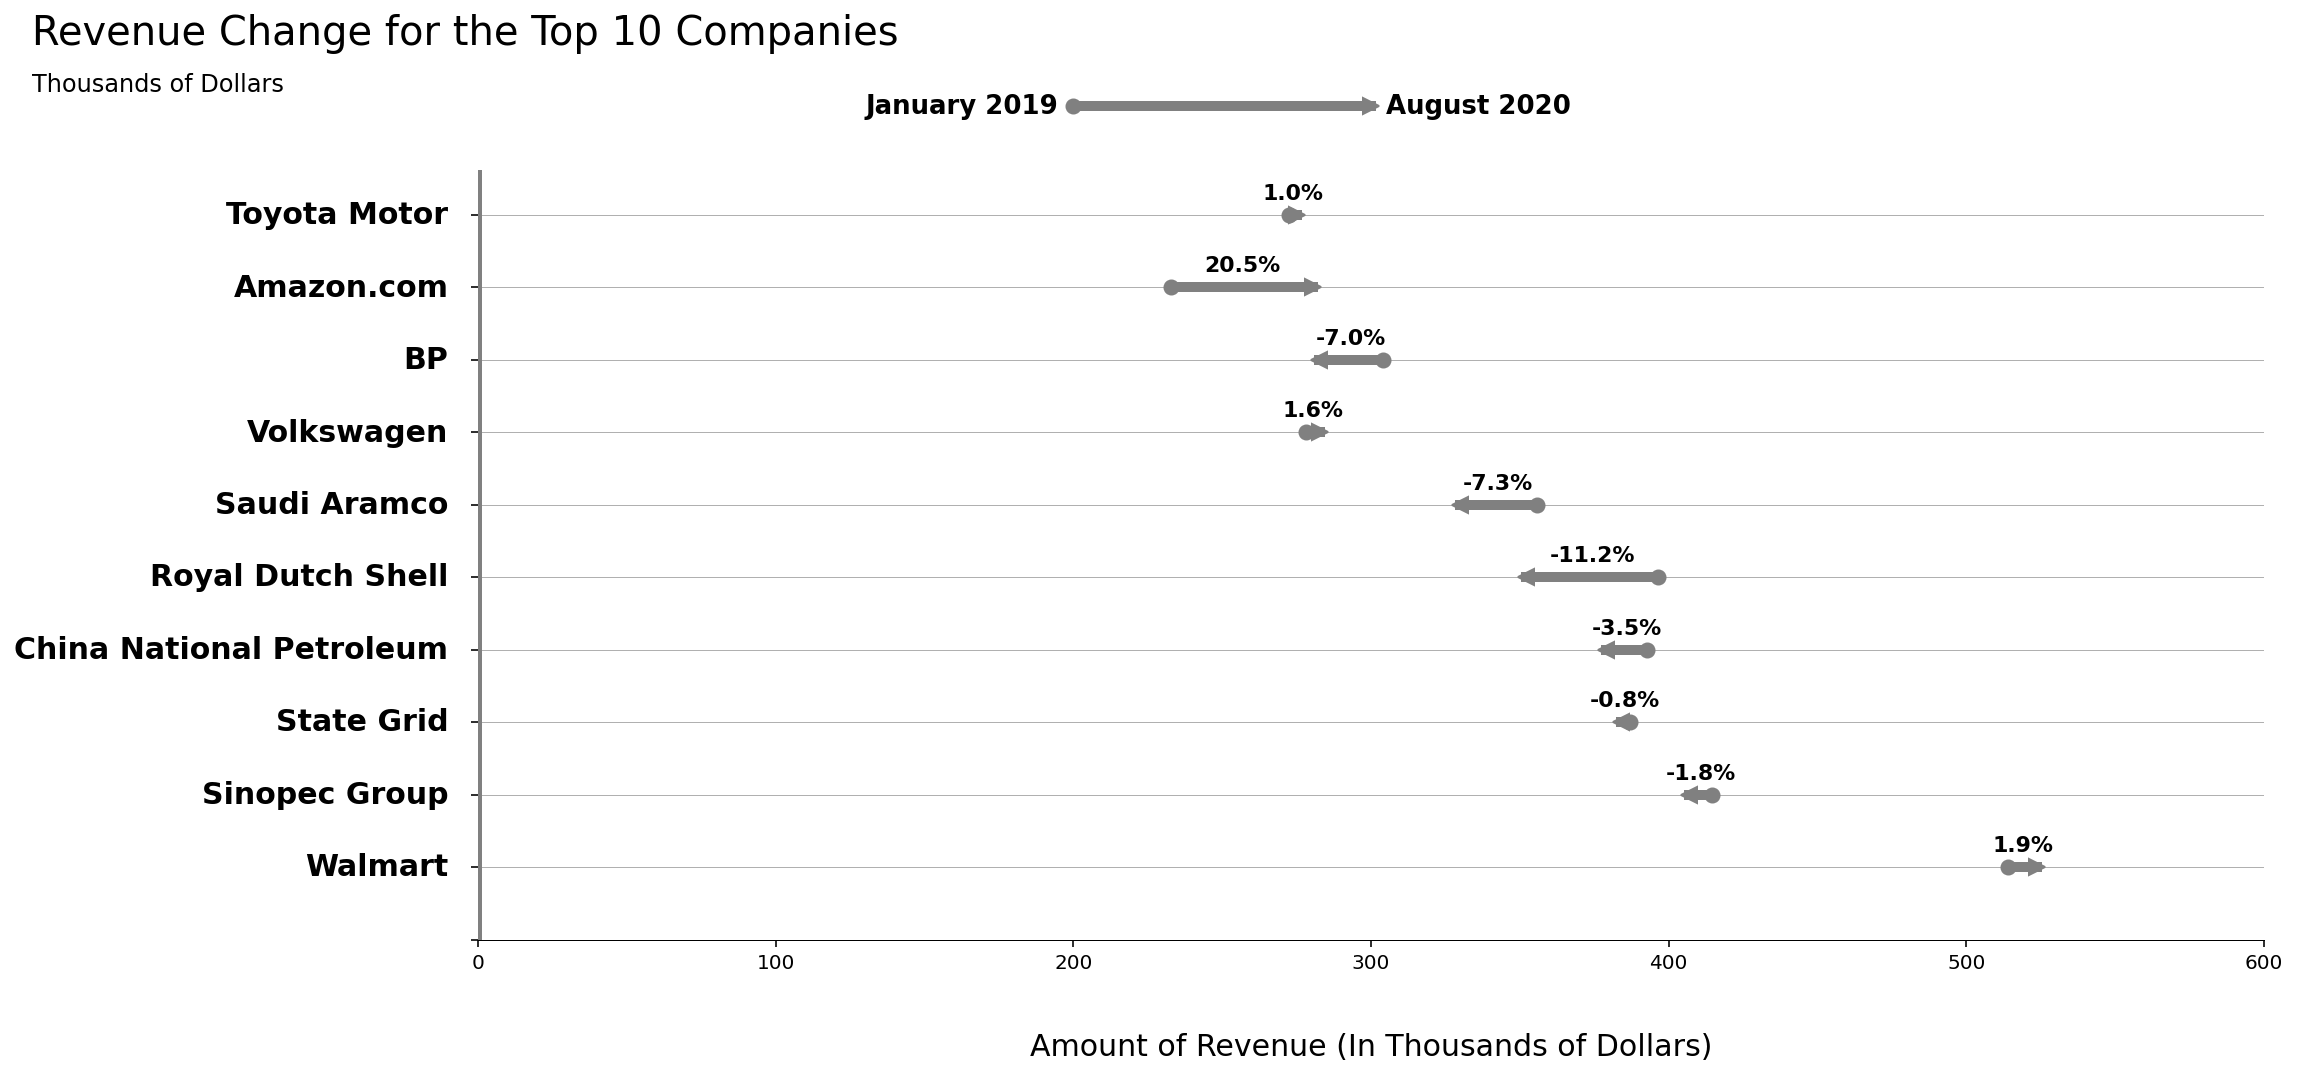

In [206]:
fig, ax = plt.subplots(figsize = (16, 8))


ax.set_xlim(0, 600)
ax.set_ylim(0, 1.2)
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.text(-150, 1.25, "Revenue Change for the Top 10 Companies", color = "black", 
       horizontalalignment = "left", verticalalignment = "center", fontsize = 20)
ax.text(-150, 1.18, "Thousands of Dollars", color = "black", horizontalalignment = "left", 
        verticalalignment = "center", fontsize = 12)

ax.set_yticklabels([])

for i,p in enumerate(new_top_10_companies["Name"].values): 
    ax.text(-10, (i + 1) * 0.1, p, color = "black", horizontalalignment = "right", 
        verticalalignment = "center", fontsize = 15, weight = 'bold')
    ax.plot([new_top_10_companies1["Revenue 2019"].values[i] / 1000], 
           [(i + 1) * 0.1], "o", markersize = 7, c = "grey")
    if new_top_10_companies1["Revenue Change"][i] > 0: 
        ax.plot([new_top_10_companies1["Revenue 2020"].values[i]/ 1000], 
                [(i + 1) * 0.1], ">", markersize = 8, c = "grey")
    else: 
        ax.plot([new_top_10_companies1["Revenue 2020"].values[i]/ 1000], 
                [(i + 1) * 0.1], "<", markersize = 8, c = "grey")
    ax.plot([new_top_10_companies1["Revenue 2019"].values[i] / 1000, new_top_10_companies1["Revenue 2020"].values[i]/ 1000], 
                [(i + 1) * 0.1, (i + 1) * 0.1], "-", lw = 5, c = "grey")
    ax.text((new_top_10_companies1["Revenue 2019"].values[i] / 1000 + 
              new_top_10_companies1["Revenue 2020"].values[i]/ 1000) / 2, (i + 1) * 0.1 + 0.03, 
           str(new_top_10_companies1["Revenue Change"][i]) + "%", horizontalalignment = "center", 
        verticalalignment = "center", fontsize = 11, weight = 'bold')
    

ax.plot([200], [1.15], "o", markersize = 7, c = "grey")
ax.plot([200, 300], [1.15, 1.15], lw = 5, c = "grey")
ax.plot([300], [1.15], ">", markersize = 8, c = "grey")
ax.text(195, 1.15, "January 2019", weight = "bold", fontsize = 13, horizontalalignment = 'right', 
       verticalalignment = 'center')
ax.text(305, 1.15, "August 2020", weight = "bold", fontsize = 13, horizontalalignment = 'left', 
       verticalalignment = 'center')
ax.set_xlabel("Amount of Revenue (In Thousands of Dollars)", fontsize = 15, labelpad = 30)

ax.grid(axis = 'y', linewidth = .5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_linewidth(.5)

plt.axvline(-0, 0, .88, linewidth = 4, c = "grey")

plt.show()

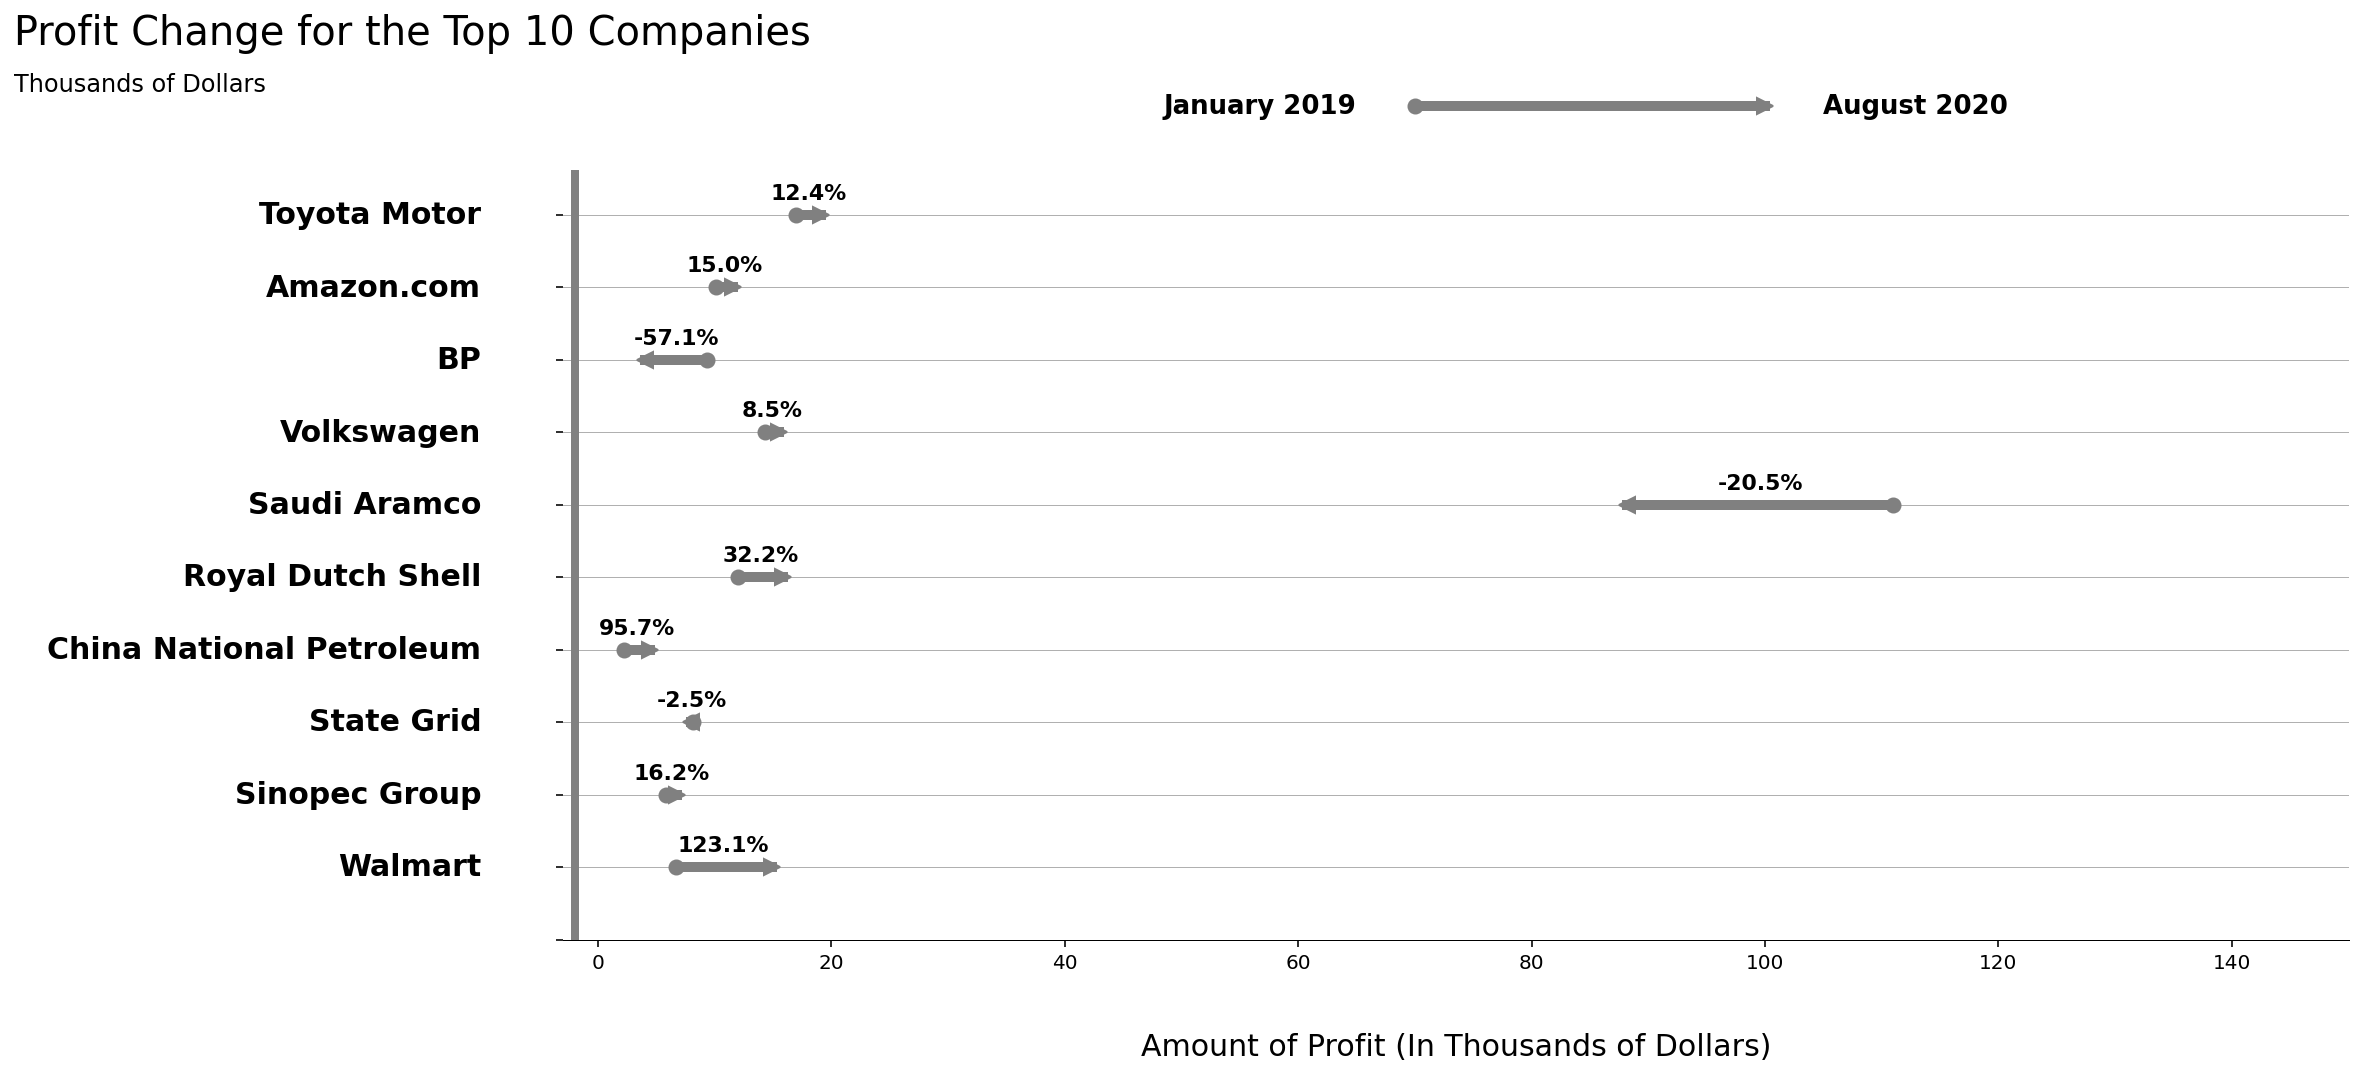

In [219]:
fig, ax = plt.subplots(figsize = (16, 8))


ax.set_xlim(-3, 150)
ax.set_ylim(0, 1.2)
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.text(-50, 1.25, "Profit Change for the Top 10 Companies", color = "black", 
       horizontalalignment = "left", verticalalignment = "center", fontsize = 20)
ax.text(-50, 1.18, "Thousands of Dollars", color = "black", horizontalalignment = "left", 
        verticalalignment = "center", fontsize = 12)

ax.set_yticklabels([])

for i,p in enumerate(new_top_10_companies["Name"].values): 
    ax.text(-10, (i + 1) * 0.1, p, color = "black", horizontalalignment = "right", 
        verticalalignment = "center", fontsize = 15, weight = 'bold')
    ax.plot([new_top_10_companies1["Profit 2019"].values[i] / 1000], 
           [(i + 1) * 0.1], "o", markersize = 7, c = "grey")
    if new_top_10_companies1["Profit Change"][i] > 0: 
        ax.plot([new_top_10_companies1["Profit 2020"].values[i]/ 1000], 
                [(i + 1) * 0.1], ">", markersize = 8, c = "grey")
    else: 
        ax.plot([new_top_10_companies1["Profit 2020"].values[i]/ 1000], 
                [(i + 1) * 0.1], "<", markersize = 8, c = "grey")
    ax.plot([new_top_10_companies1["Profit 2019"].values[i] / 1000, new_top_10_companies1["Profit 2020"].values[i]/ 1000], 
                [(i + 1) * 0.1, (i + 1) * 0.1], "-", lw = 5, c = "grey")
    ax.text((new_top_10_companies1["Profit 2019"].values[i] / 1000 + 
              new_top_10_companies1["Profit 2020"].values[i]/ 1000) / 2, (i + 1) * 0.1 + 0.03, 
           str(new_top_10_companies1["Profit Change"][i]) + "%", horizontalalignment = "center", 
        verticalalignment = "center", fontsize = 11, weight = 'bold')
    

ax.plot([70], [1.15], "o", markersize = 7, c = "grey")
ax.plot([70, 100], [1.15, 1.15], lw = 5, c = "grey")
ax.plot([100], [1.15], ">", markersize = 8, c = "grey")
ax.text(65, 1.15, "January 2019", weight = "bold", fontsize = 13, horizontalalignment = 'right', 
       verticalalignment = 'center')
ax.text(105, 1.15, "August 2020", weight = "bold", fontsize = 13, horizontalalignment = 'left', 
       verticalalignment = 'center')
ax.set_xlabel("Amount of Profit (In Thousands of Dollars)", fontsize = 15, labelpad = 30)

ax.grid(axis = 'y', linewidth = .5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_linewidth(.5)

plt.axvline(-2, 0, .88, linewidth = 4, c = "grey")

plt.show()

## Question 2

In [52]:
data = {'2019':[101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41], 
        '2018':[38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86]
       }
months = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November','December']
months_simplified = [i[:3] for i in months]

vehicles_sold = pd.DataFrame(data)

,2019,2018
0,101,38
1,78,47
2,91,49
3,77,42
4,78,42
5,71,38
6,78,43
7,62,52
8,68,49
9,50,67


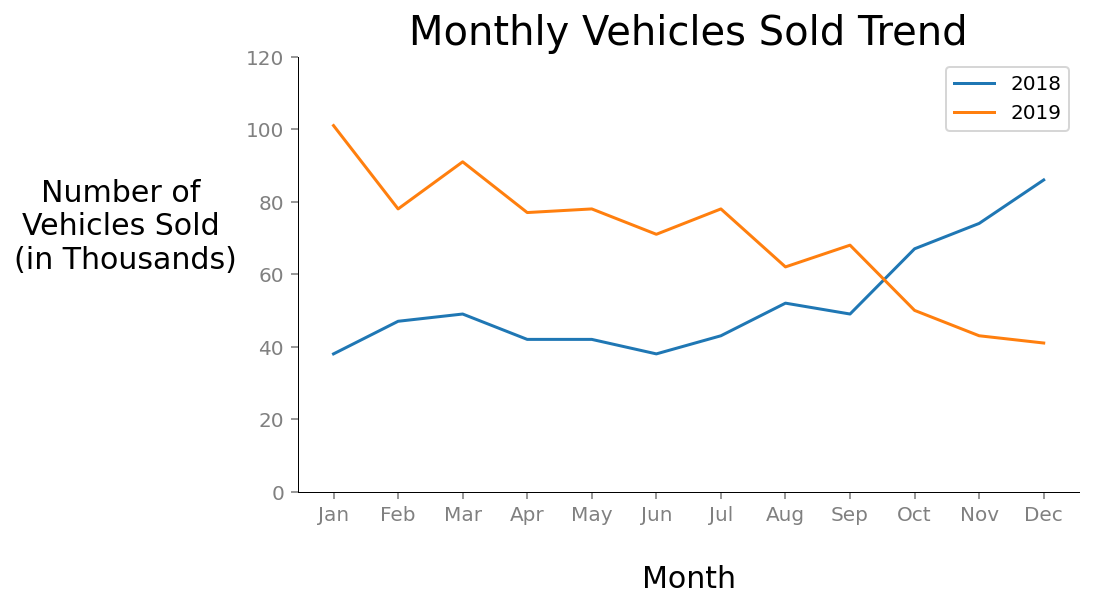

In [76]:
fig, ax = plt.subplots(figsize = (7, 4))

ax.set_ylim(0, 120)
ax.set_title("Monthly Vehicles Sold Trend", fontsize = 20)
ax.set_xlabel("Month", fontsize = 15, labelpad = 20)
ax.set_ylabel("Number of \nVehicles Sold \n(in Thousands)", rotation = 0, labelpad = 60, fontsize = 15)
ax.plot(months_simplified, vehicles_sold['2018'], label = "2018")
ax.plot(months_simplified, vehicles_sold['2019'], label = "2019")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5) 
ax.spines['bottom'].set_linewidth(.5)

ax.tick_params(axis = 'both', colors = 'gray')

plt.legend()
fig.patch.set_facecolor("white")
plt.show()

To declutter the graph from the figure in Storytelling with Data, I first removed the gridlines from the original graph as well as emphasized the title, the xlabel, and the ylabel with bigger fonts and more whitespace between the label and the axis lines. I also made the xticks and yticks a lighter shade since they are of lesser importance to the overall trend of the graph. I added a legend to show more specifically what each line represents and got rid of extra grid lines on the top and right and deemphasized the grid lines on the bottom and the left. This got rid of a lot of clutter and unnecessary information. Therefore, the audience can focus on the trends from the two lines. 